<a href="https://colab.research.google.com/github/anjanasa13/British-Airways-Project/blob/main/British_Airways_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()



array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
# Assuming 'df' is your DataFrame

# Separate features (X) and target variable (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Encode categorical variables in X using factorize
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()


In [ ]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [ ]:
from sklearn.feature_selection import mutual_info_classif


# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Create a Series with feature names as index and MI scores as values
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

# Sort the features based on MI scores in descending order
mi_scores = mi_scores.sort_values(ascending=False)

# Display the MI scores
mi_scores


route                    0.052580
booking_origin           0.047990
flight_duration          0.016910
wants_extra_baggage      0.009094
length_of_stay           0.008365
wants_in_flight_meals    0.004409
num_passengers           0.004175
wants_preferred_seat     0.002480
flight_day               0.002416
flight_hour              0.002106
purchase_lead            0.001165
sales_channel            0.000000
trip_type                0.000000
Name: MI Scores, dtype: float64

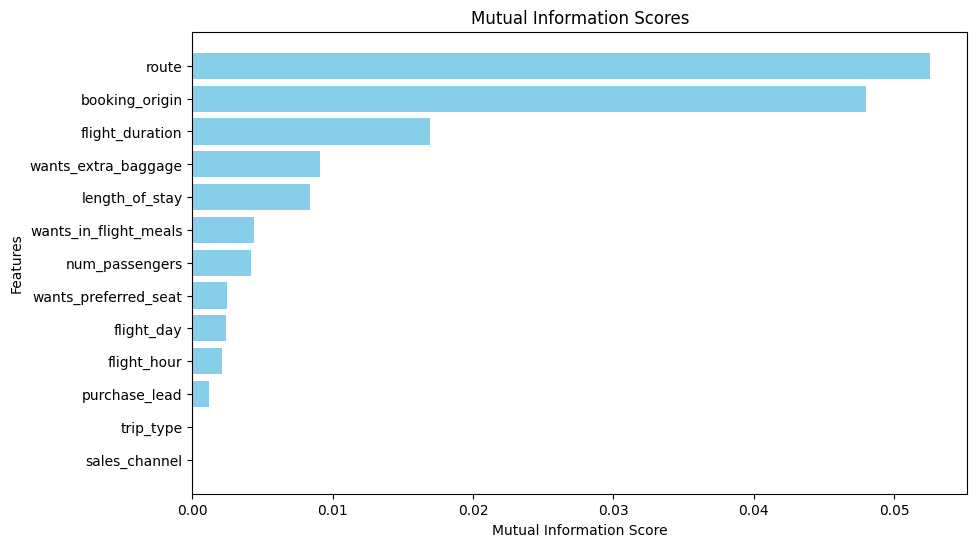

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mi_scores(scores):
    # Sorting the scores in ascending order
    scores = scores.sort_values(ascending=True)

    # Setting up the plot
    plt.figure(figsize=(10, 6))
    plt.barh(scores.index, scores, color='skyblue')

    # Adding labels and title
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Features')
    plt.title('Mutual Information Scores')

    # Displaying the plot
    plt.show()

plot_mi_scores(mi_scores)


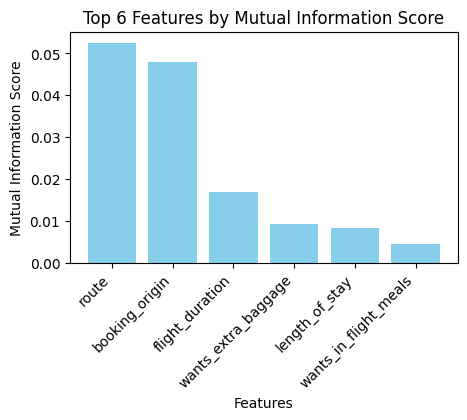

In [ ]:
def plot_top_mi_scores(scores, top_n=6):
    # Sorting the scores in descending order and selecting the top N
    top_scores = scores.sort_values(ascending=False).head(top_n)

    # Setting up the plot
    plt.figure(figsize=(5, 3))
    plt.bar(top_scores.index, top_scores, color='skyblue')

    # Adding labels and title
    plt.xlabel('Features')
    plt.ylabel('Mutual Information Score')
    plt.title(f'Top {top_n} Features by Mutual Information Score')

    # Rotating x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Displaying the plot
    plt.show()

plot_top_mi_scores(mi_scores, top_n=6)


In [ ]:
from sklearn.model_selection import train_test_split

def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

Random forest classifier with top six features

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','wants_in_flight_meals']
X= df[features]

X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.56
AUC score:  0.5620721119996049


Random forest classifier with all features

In [ ]:
X= df.drop('booking_complete',axis=1)

X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.84
AUC score:  0.5527766076821664


In [ ]:
X

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5.52,1,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5.52,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,1,...,0,0,0,0,0,0,0,0,0,0
49996,1,111,6,4,7,0,0,0,5.62,1,...,0,0,0,0,0,0,0,0,0,0
49997,1,24,6,22,6,0,0,1,5.62,1,...,0,0,0,0,0,0,0,0,0,0
49998,1,15,6,11,1,1,0,1,5.62,1,...,0,0,0,0,0,0,0,0,0,0


XGB classifier with top six features

In [ ]:
from xgboost import XGBClassifier

X= df[features]

X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.76
AUC score:  0.5218910676419618


XGB 6 no.2

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'wants_in_flight_meals']
X = df[features]


X = pd.get_dummies(X, columns=features)
X= scale(X)

# Target variable
y = df.booking_complete

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Creating and training the XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Making predictions on the validation set
prediction_xgb = xgb_model.predict(X_val)

# Calculating and printing accuracy and AUC-ROC score
print('ACCURACY: ', accuracy_score(y_val, prediction_xgb) * 100)
print('AUC score: ', roc_auc_score(y_val, prediction_xgb))


ACCURACY:  84.89999999999999
AUC score:  0.526934511731279


XGB classifier with all features

In [ ]:
X= df.drop('booking_complete',axis=1)

X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))


ACCURACY:  84.66
AUC score:  0.5354228242704853


Comparing the accuracy and auc scores promoting random forest with all features as the final model

In [ ]:
X= df.drop('booking_complete',axis=1)

X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

train_full_X,test_X, train_full_y, test_y =train_test_split(X, y,test_size=0.2,random_state = 0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  85.37
AUC score:  0.5678474780954598
